# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#### Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


In [3]:
#units = "imperial"

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

#### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}&appid={weather_api_key}&q={city_data}&units={units}"
    city_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units=imperial"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | vorkuta
Processing Record 3 of Set 1 | mejit
Processing Record 4 of Set 1 | qamdo
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | axim
Processing Record 8 of Set 1 | sainte-menehould
Processing Record 9 of Set 1 | robbah
Processing Record 10 of Set 1 | san antonio de pale
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | antsiranana
Processing Record 19 of Set 1 | dubna
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | yellowknife


Processing Record 38 of Set 4 | college
Processing Record 39 of Set 4 | eastham
Processing Record 40 of Set 4 | qaisumah
Processing Record 41 of Set 4 | waghai
Processing Record 42 of Set 4 | puerto deseado
Processing Record 43 of Set 4 | isafjordur
Processing Record 44 of Set 4 | happy valley-goose bay
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | tumut
Processing Record 47 of Set 4 | awjilah
Processing Record 48 of Set 4 | mount pearl
Processing Record 49 of Set 4 | talnakh
Processing Record 0 of Set 5 | geraldton
Processing Record 1 of Set 5 | saudarkrokur
Processing Record 2 of Set 5 | tobarra
Processing Record 3 of Set 5 | carutapera
Processing Record 4 of Set 5 | haiku-pauwela
Processing Record 5 of Set 5 | hotan
Processing Record 6 of Set 5 | nar'yan-mar
Processing Record 7 of Set 5 | dakhla
Processing Record 8 of Set 5 | pibor
City not found. Skipping...
Processing Record 9 of Set 5 | taro
Processing Record 10 of Set 5 | alamogordo
Processing Re

Processing Record 29 of Set 8 | waat
Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | laojunmiao
Processing Record 32 of Set 8 | igrim
Processing Record 33 of Set 8 | ath thawrah
Processing Record 34 of Set 8 | princeville
Processing Record 35 of Set 8 | nevel'sk
Processing Record 36 of Set 8 | labytnangi
Processing Record 37 of Set 8 | takoradi
Processing Record 38 of Set 8 | mili
Processing Record 39 of Set 8 | villanueva
Processing Record 40 of Set 8 | espargos
City not found. Skipping...
Processing Record 41 of Set 8 | machico
Processing Record 42 of Set 8 | sao vicente
Processing Record 43 of Set 8 | male
Processing Record 44 of Set 8 | masterton
Processing Record 45 of Set 8 | bikenibeu village
Processing Record 46 of Set 8 | vilyuysk
Processing Record 47 of Set 8 | maneromango
Processing Record 48 of Set 8 | newcastle
Processing Record 49 of Set 8 | puerto baquerizo moreno
Processing Record 0 of Set 9 | saint-jean-de-monts
Processing Record 1 of Set 9

Processing Record 19 of Set 12 | mata-utu
Processing Record 20 of Set 12 | zalla
Processing Record 21 of Set 12 | rio tuba
Processing Record 22 of Set 12 | chibougamau
Processing Record 23 of Set 12 | daru
Processing Record 24 of Set 12 | sarnia
Processing Record 25 of Set 12 | kaffrine
Processing Record 26 of Set 12 | hedensted
Processing Record 27 of Set 12 | new norfolk
Processing Record 28 of Set 12 | porto belo
Processing Record 29 of Set 12 | ta`u
Processing Record 30 of Set 12 | brecon
Processing Record 31 of Set 12 | ugurludag
Processing Record 32 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 33 of Set 12 | kiama
Processing Record 34 of Set 12 | grand gaube
Processing Record 35 of Set 12 | gonabad
Processing Record 36 of Set 12 | lihue
Processing Record 37 of Set 12 | chakia
Processing Record 38 of Set 12 | hirara
Processing Record 39 of Set 12 | nuku'alofa
Processing Record 40 of Set 12 | livingstone
Processing Record 41 of Set 12 | vernon
Processing 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count() 

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,55.76,84,4,20.98,NZ,1699919128
1,vorkuta,67.5000,64.0000,3.72,93,95,6.60,RU,1699919721
2,mejit,10.2753,170.8646,82.36,81,68,17.94,MH,1699919682
3,qamdo,31.1667,97.2333,20.10,58,3,4.09,CN,1699919721
4,port-aux-francais,-49.3500,70.2167,44.35,97,100,37.22,TF,1699919722


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,55.76,84,4,20.98,NZ,1699919128
1,vorkuta,67.5000,64.0000,3.72,93,95,6.60,RU,1699919721
2,mejit,10.2753,170.8646,82.36,81,68,17.94,MH,1699919682
3,qamdo,31.1667,97.2333,20.10,58,3,4.09,CN,1699919721
4,port-aux-francais,-49.3500,70.2167,44.35,97,100,37.22,TF,1699919722


### Create the Scatter Plots Requested

##### Latitude Vs. Temperature

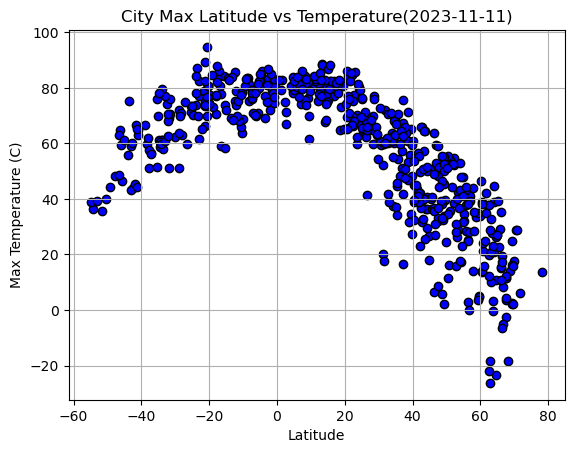

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
             city_data_df["Max Temp"], color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature(2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

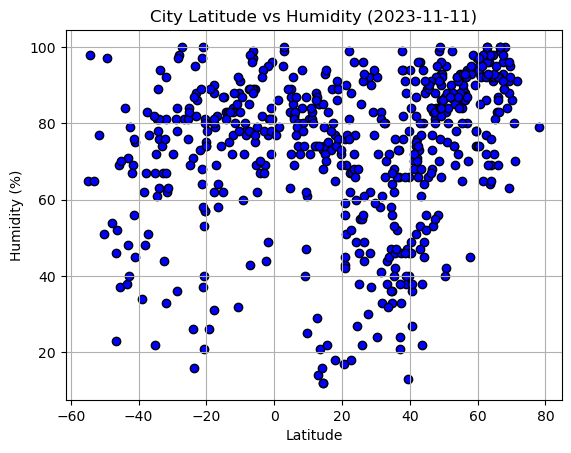

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

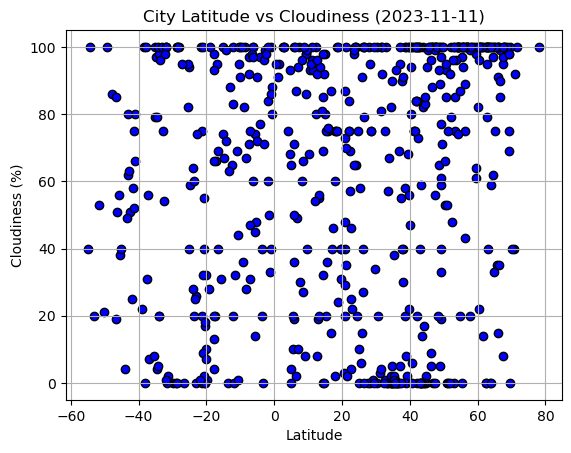

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

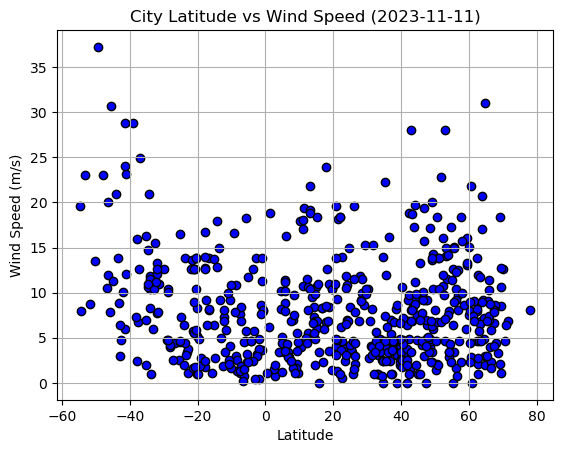

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values, color="blue")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()    


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vorkuta,67.5000,64.0000,3.72,93,95,6.60,RU,1699919721
2,mejit,10.2753,170.8646,82.36,81,68,17.94,MH,1699919682
3,qamdo,31.1667,97.2333,20.10,58,3,4.09,CN,1699919721
6,axim,4.8699,-2.2405,78.84,89,4,5.10,GH,1699919507
7,sainte-menehould,49.0833,4.9000,55.29,93,59,13.58,FR,1699919723


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,55.76,84,4,20.98,NZ,1699919128
4,port-aux-francais,-49.3500,70.2167,44.35,97,100,37.22,TF,1699919722
5,grytviken,-54.2811,-36.5092,36.28,98,100,7.99,GS,1699919127
9,san antonio de pale,-1.4014,5.6325,79.21,81,50,8.68,GQ,1699919724
13,adamstown,-25.0660,-130.1015,73.09,84,94,16.46,PN,1699919725


### Temperature vs. Latitude Regression Plot

The r-squared is: 0.7468557968493216


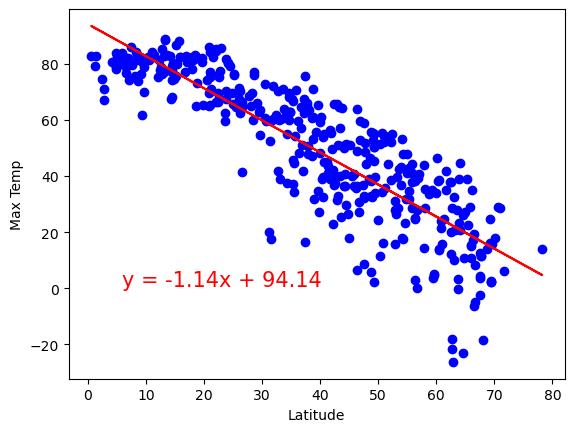

In [16]:
# Linear regression on Northern Hemisphere
x_northern = northern_hemi_df["Lat"]
y_northern = northern_hemi_df["Max Temp"]
yl = "Max Temp"
linear_regression_plot(x_northern, y_northern, yl)

The r-squared is: 0.5417117520786368


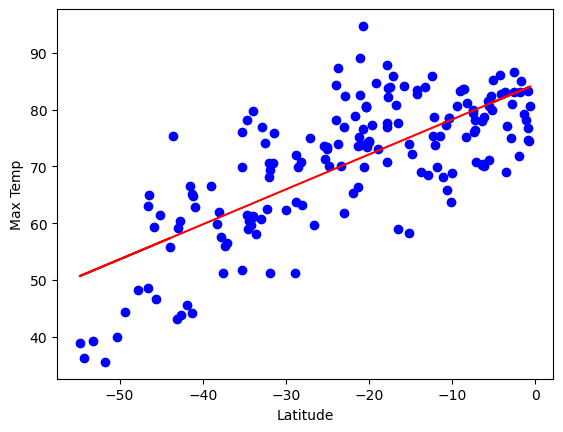

In [17]:
# Linear regression on Southern Hemisphere
x_southern = southern_hemi_df["Lat"]
y_southern = southern_hemi_df["Max Temp"]
yl = "Max Temp"
linear_regression_plot(x_southern, y_southern, yl)

### Humidity vs. Latitude Linear Regression Plot     

The r-squared is: 0.08670447421056816


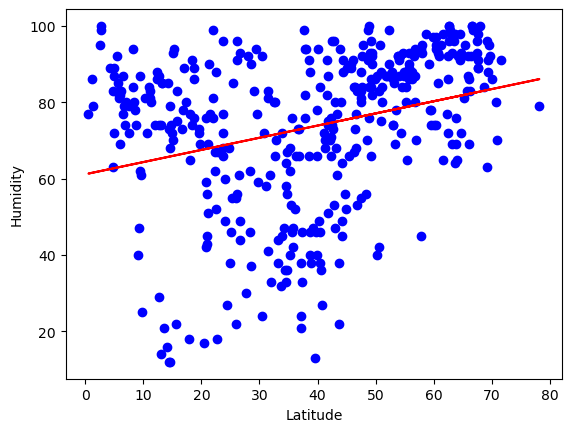

In [18]:
# Northern Hemisphere
x_northern = northern_hemi_df["Lat"]
y_northern = northern_hemi_df["Humidity"]
yl = "Humidity"
linear_regression_plot(x_northern, y_northern, yl)

The r-squared is: 0.08541656924164089


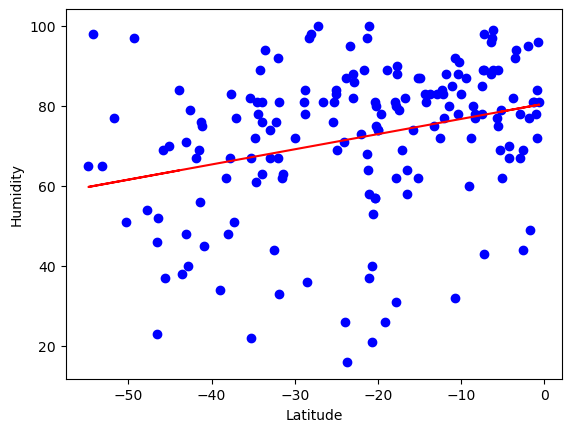

In [19]:
# Southern Hemisphere
x_southern = southern_hemi_df["Lat"]
y_southern = southern_hemi_df["Humidity"]
yl = "Humidity"
linear_regression_plot(x_southern, y_southern, yl)

##### Linear Relationship

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.030609337123003295


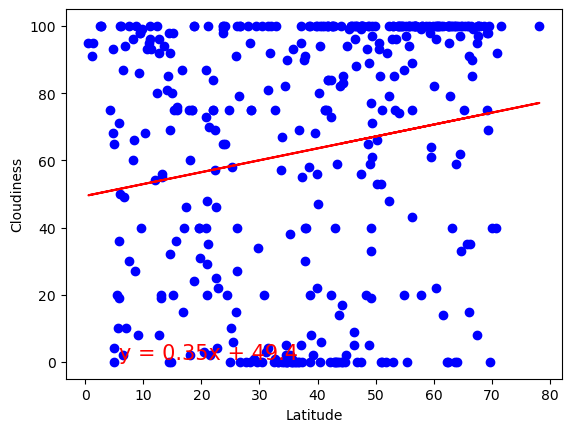

In [20]:
# Northern Hemisphere
x_northern = northern_hemi_df["Lat"]
y_northern = northern_hemi_df["Cloudiness"]
yl = "Cloudiness"
linear_regression_plot(x_northern, y_northern, yl)

The r-squared is: 0.01772714830174628


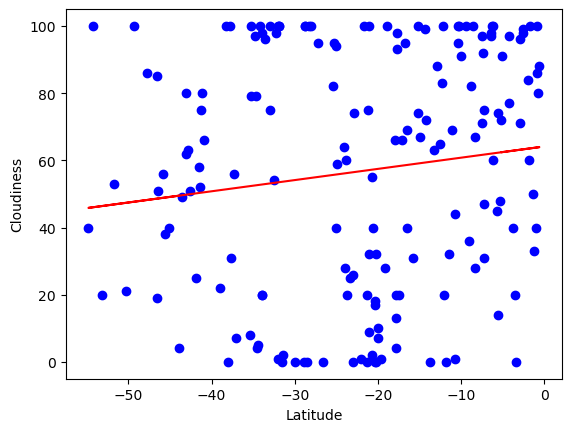

In [21]:
# Southern Hemisphere
x_southern = southern_hemi_df["Lat"]
y_southern = southern_hemi_df["Cloudiness"]
yl = "Cloudiness"
linear_regression_plot(x_southern, y_southern, yl)

#### Linear Relationship

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004348084144655566


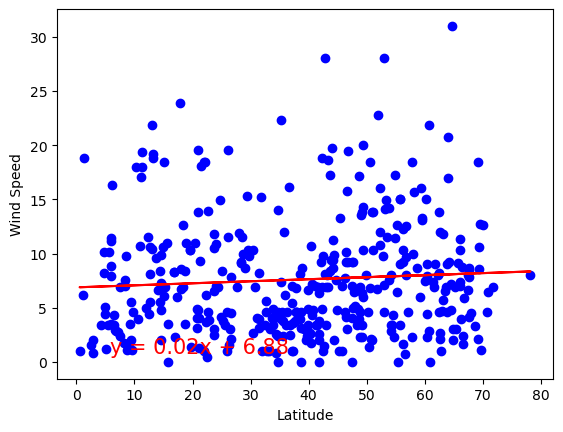

In [22]:
# Northern Hemisphere
x_northern = northern_hemi_df["Lat"]
y_northern = northern_hemi_df["Wind Speed"]
yl = "Wind Speed"
linear_regression_plot(x_northern, y_northern, yl)

The r-squared is: 0.2180190061524622


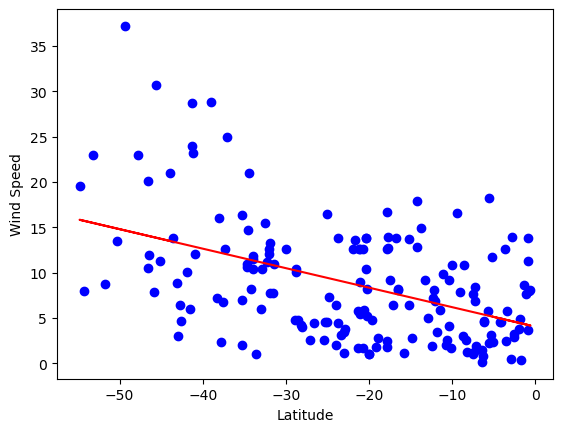

In [23]:
# Southern Hemisphere
x_southern = southern_hemi_df["Lat"]
y_southern = southern_hemi_df["Wind Speed"]
yl = "Wind Speed"
linear_regression_plot(x_southern, y_southern, yl)

#### Linear Relationship